In [52]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge html5lib --yes
!conda install -c conda-forge tabulate --yes
!conda install -c conda-forge pdfminer3k --yes


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [53]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plottin`g modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
from bs4 import BeautifulSoup as bs
import lxml
import requests
from tabulate import tabulate
import pandas as pd
import numpy as np

In [54]:
address = 'Avadi,CH'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Avadi are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Avadi are 13.1254758, 80.09409.


In [55]:
CLIENT_ID = '30EXXJY2HBSDPTTTYZFRPZAILSBAMOO0P4KGLCQWEZ3I1I4I' # your Foursquare ID
CLIENT_SECRET = 'ZRKNTYYRQSUX0Q4DDTYBRYYPUMOMD3VVSQYWZT2YELF3SNRX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 30EXXJY2HBSDPTTTYZFRPZAILSBAMOO0P4KGLCQWEZ3I1I4I
CLIENT_SECRET:ZRKNTYYRQSUX0Q4DDTYBRYYPUMOMD3VVSQYWZT2YELF3SNRX


In [56]:
neighborhood_latitude = latitude # neighborhood latitude value
neighborhood_longitude = longitude # neighborhood longitude value

LIMIT = 200
radius = 40000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=Restaurant'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=30EXXJY2HBSDPTTTYZFRPZAILSBAMOO0P4KGLCQWEZ3I1I4I&client_secret=ZRKNTYYRQSUX0Q4DDTYBRYYPUMOMD3VVSQYWZT2YELF3SNRX&v=20180605&ll=13.1254758,80.09409&radius=40000&limit=200&query=Restaurant'

In [57]:
results = requests.get(url).json()

In [58]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]



In [60]:
Tiruvallur_Food_Chain=nearby_venues
Tiruvallur_Food_Chain.head(50)

,name,categories,lat,lng
0,Subway,Sandwich Place,13.082455,80.210927
1,Cream Centre,Vegetarian / Vegan Restaurant,13.090306,80.216317
2,Shree Mithai,Indian Restaurant,13.072118,80.247865
3,Sangeetha Drive-in Restaurant,South Indian Restaurant,13.045672,80.068746
4,Barbeque Nation,BBQ Joint,13.052680,80.212550
5,Murugan Idly Shop,South Indian Restaurant,13.082277,80.214331
6,"Ottimo Cucina Italiana, ITC Grand Chola",Italian Restaurant,13.010444,80.220938
7,Coco Jaunt,Café,13.090318,80.217500
8,Bombay Chat,Fast Food Restaurant,13.040300,80.193134
9,Kabab Corner,Diner,13.060163,80.254485


In [61]:
page_link='http://www.shreyasbharadwaj.com/my-life/indian-names-for-food-products'
ing_pulse=requests.get(page_link)#hint: requests.get()
page=ing_pulse.text

In [62]:
soup=bs(page,'lxml')

In [19]:
#print(soup.prettify())

In [63]:
table=soup.find('tbody')
tds=table.find_all('td')    

In [64]:
L=len(tds)
t_pulses=[]
for i in range(1,L,3):
    t_pulses.append(tds[i].text)
    t_pulses[-1] = t_pulses[-1].strip()

In [20]:
print(t_pulses)


['Pigeon pea / Red gram', 'Chickpeas (Brown)', 'Chickpeas (Green)', 'Split Bengal gram', 'Black-eyed beans / Cowpea', 'Pulses / Split beans / Beans', 'Broken wheat', 'Garbanzo beans / Chickpeas (White)', 'Horse gram', 'Puffed rice', 'Red lentils', 'Pea', 'Green gram / Mung bean', 'Turkish gram / Moth bean', 'Beaten rice', 'Kidney beans', 'Sesame', 'Black gram / Black lentil (whole) / White lentil (dehusked)', 'Field beans']


In [65]:
table1 = soup.find_all('table')[1]
tds1=table1.find_all('td') 

In [66]:
L1=len(tds1)
t_cereals=[]
for i in range(1,L1,3):
    t_cereals.append(tds1[i].text)
    t_cereals[-1] = t_cereals[-1].strip()

In [23]:
print(t_cereals)

['Pearl millet', 'Rice', 'Wheat', 'Barley', 'Sorghum bicolor', 'Maize, Corn', 'Finger millet']


In [67]:
table2 = soup.find_all('table')[2]
tds2=table2.find_all('td') 

In [68]:
L2=len(tds2)
t_spices=[]
for i in range(1,L2,3):
    t_spices.append(tds2[i].text)
    t_spices[-1] = t_spices[-1].strip()

In [20]:
print(t_spices)

['Ginger', 'Carom Seeds / Thyme', 'Star Anise', 'Cinnamon', 'Green Cardamom', 'Brown Cardamom', 'Asafoetida', 'Nutmeg', 'Mace', 'Cumin', 'Black Pepper', 'Garlic', 'Clove', 'Mustard seeds (small)', 'Mustard seeds (big)', 'Bay leaf']


In [69]:
table3 = soup.find_all('table')[3]
tds3=table3.find_all('td') 
L3=len(tds3)
t_seeds=[]
for i in range(1,L3,3):
    t_seeds.append(tds3[i].text)
    t_seeds[-1] = t_seeds[-1].strip()

In [27]:
print(t_seeds)

['Anise / Aniseed', 'Refined flour', 'Semolina', 'Sago', 'Fennel Seed']


In [70]:
lp=len(t_pulses)
lc=len(t_cereals)
ls=len(t_seeds)
lsp=len(t_spices)
print(lp,lc,ls,lsp)

19 7 5 16


In [71]:
t_spices.append('Coriander ')
t_spices.append('Turmeric')
t_spices.append('Fenugreek')
lk=len(t_spices)
print(lk)

19


In [32]:
print(t_cereals)

['Pearl millet', 'Rice', 'Wheat', 'Barley', 'Sorghum bicolor', 'Maize, Corn', 'Finger millet']


In [72]:
t_cereals.append('foxtail millet')
t_cereals.append('rye')
t_cereals.append('barnyard millet')
t_cereals.append('kodo millet')
t_cereals.append('oats')
t_cereals.append('amaranth')
t_cereals.append('BuckWheat')
t_cereals.append('Rice Flakes')
t_cereals.append('Flaked rice')
t_cereals.append('little millet')
t_cereals.append('Vermicelli')




In [73]:
t_cereals.append('Raw Rice')
print(len(t_cereals))

19


In [35]:
print(len(t_seeds))

5


In [74]:
t_seeds.append('palmJaggery')
t_seeds.append('Chillies')
t_seeds.append('RiceFlour')
t_seeds.append('CornFlour')
t_seeds.append('Coconut')
t_seeds.append('saffron')
t_seeds.append('Tamarind')
t_seeds.append('Flax')
t_seeds.append('Poppy')
t_seeds.append('BlackSesame')
t_seeds.append('WhiteSesame')
t_seeds.append('Almond')
t_seeds.append('Cashew')
t_seeds.append('Peanut')



In [37]:
print(len(t_seeds))

19


In [75]:
tbl={}
tbl={'Pulses':t_pulses,'Cereals':t_cereals,'Spices':t_spices,'Seeds/Nuts':t_seeds}

In [76]:
df=pd.DataFrame(tbl)
df.head(50)


,Pulses,Cereals,Spices,Seeds/Nuts
0,Pigeon pea / Red gram,Pearl millet,Ginger,Anise / Aniseed
1,Chickpeas (Brown),Rice,Carom Seeds / Thyme,Refined flour
2,Chickpeas (Green),Wheat,Star Anise,Semolina
3,Split Bengal gram,Barley,Cinnamon,Sago
4,Black-eyed beans / Cowpea,Sorghum bicolor,Green Cardamom,Fennel Seed
5,Pulses / Split beans / Beans,"Maize, Corn",Brown Cardamom,palmJaggery
6,Broken wheat,Finger millet,Asafoetida,Chillies
7,Garbanzo beans / Chickpeas (White),foxtail millet,Nutmeg,RiceFlour
8,Horse gram,rye,Mace,CornFlour
9,Puffed rice,barnyard millet,Cumin,Coconut


In [77]:
df.to_csv(r'labs\DP0701EN\indianCusine.csv',header=True)

In [78]:
address = 'Avadi, CH'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Avadi are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Avadi are 13.1254758, 80.09409.


In [81]:
map_avadi = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tiruvallur_Food_Chain['lat'], Tiruvallur_Food_Chain['lng'], Tiruvallur_Food_Chain['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_avadi)  
    
map_avadi


In [80]:
Tiruvallur_Taluk=pd.read_csv('Tiruvallur_Taluk.csv')

In [40]:
Tiruvallur_Taluk.head()

,TalukName,Lattitude,Longitude
0,Amabattur,13.114317,80.148055
1,Gummidipundi,13.458765,80.115755
2,Pallipattu,13.337009,79.445073
3,Ponneri,13.337830,80.192901
4,Poonamalle,13.047261,80.094531


In [82]:
map_Tiruvallur = folium.Map(location=[13.14376, 79.90889], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tiruvallur_Taluk['Lattitude'], Tiruvallur_Taluk['Longitude'], Tiruvallur_Taluk['TalukName']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Tiruvallur)  
    
map_Tiruvallur

In [98]:
df_crop=pd.read_csv('Tiruvallur_Crops.csv')

In [99]:
df_crop.head(20)

,Crops,Production
0,Sugarcane,817608
1,Groundnut,85600
2,Rice,398152
3,Liitle Millet,1752
4,Rye,3773
5,Green Gram,4013
6,Black Gram,1317
7,Chillies,1681
8,Turmeric,28
9,Tamerind,182


In [100]:
cols=df_crop.columns
print(cols)

Index(['Crops ', 'Production\n'], dtype='object')


In [85]:
import matplotlib.pyplot as plt


In [103]:
d1=df_crop.loc[0:2,"Production\n"]
d2=df_crop.loc[0:2,"Crops "]

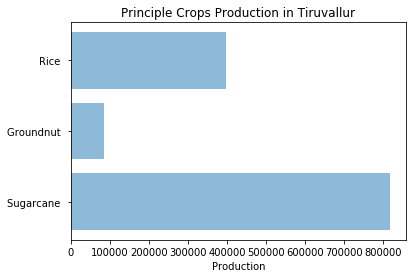

In [105]:
y_pos = np.arange(len(d2))
performance = d1
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, d2)
plt.xlabel('Production')
plt.title('Principle Crops Production in Tiruvallur')
 
plt.show()

In [106]:
d1=df_crop.loc[3:9,"Production\n"]
d2=df_crop.loc[3:9,"Crops "]

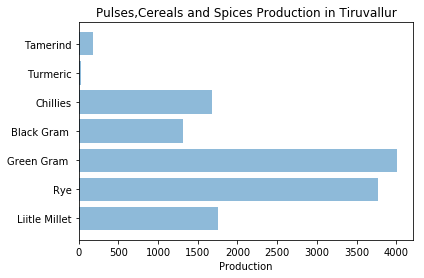

In [108]:
y_pos = np.arange(len(d2))
performance = d1
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, d2)
plt.xlabel('Production')
plt.title('Pulses,Cereals and Spices Production in Tiruvallur')
 
plt.show()